In [1]:
import numpy as np
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

from lib import tally

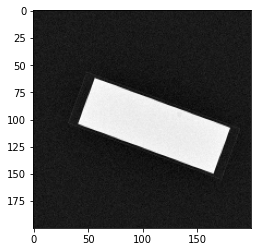

In [8]:
dimension = (200, 200, 1)
image_3d = tally.usrbin(r"XrayBat-master\gen_hole\output\res1_run001_fort.22", dimension)
image_2d = image_3d[:,:,0]
image_2d = (image_2d / image_2d.max() * -1) + 1

img_th = image_2d > ((image_2d.max() + image_2d.min()) / 2)

plt.imshow(image_2d, cmap='gray')

In [9]:
print(img_th)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


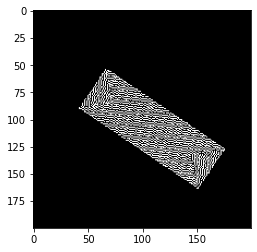

In [10]:
img_rot = rotate(img_th, -13.9, reshape=False)
plt.imshow(img_rot, cmap='gray')
print(img_rot)

In [11]:
print(np.sum(img_th))

5971


In [12]:
nonzero = np.nonzero(img_th)
nonzero = np.array(nonzero).T

In [13]:
print(nonzero.shape)
print(nonzero)

(5971, 2)
[[ 62  57]
 [ 63  56]
 [ 63  57]
 ...
 [149 163]
 [149 164]
 [149 165]]


In [14]:
X = nonzero.copy()
# X = np.random.randint(10, 50, 100).reshape(50, 2)
print(X)

[[ 62  57]
 [ 63  56]
 [ 63  57]
 ...
 [149 163]
 [149 164]
 [149 165]]


In [15]:
X_meaned = X - np.mean(X, axis=0)
print(np.mean(X, axis=0))
print(X_meaned)

[105.74208675 110.61346508]
[[-43.74208675 -53.61346508]
 [-42.74208675 -54.61346508]
 [-42.74208675 -53.61346508]
 ...
 [ 43.25791325  52.38653492]
 [ 43.25791325  53.38653492]
 [ 43.25791325  54.38653492]]


In [16]:
cov_mat = np.cov(X_meaned, rowvar=False)
print(cov_mat)

[[ 324.00516141  420.49040808]
 [ 420.49040808 1310.95542335]]


In [17]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

In [18]:
print(sorted_eigenvalues)
print(sorted_eigenvectors)

[1465.80882651  169.15175824]
[[ 0.34557937 -0.93838952]
 [ 0.93838952  0.34557937]]


In [19]:
print(sorted_eigenvectors[0, 1])
angle = np.arctan(sorted_eigenvectors[0, 0]/sorted_eigenvectors[0, 1])
print(angle)
angle = 180 * angle / np.pi
print(angle)

-0.9383895233828389
-0.3528561260283073
-20.21716679675828


In [20]:
mask_rot = rotate(img_th, -angle, reshape=False)
y, x = np.nonzero(mask_rot)
y_mean, x_mean = int(np.mean(y)), int(np.mean(x))
print(y_mean, x_mean)

101 112


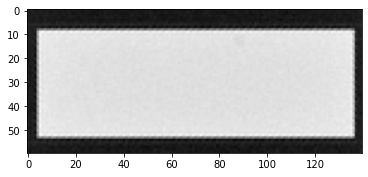

In [22]:
img_clean = np.zeros((60, 140), dtype=np.float32)
img_rot = rotate(image_2d, -angle, reshape=False)
img_clean = img_rot[y_mean-30:y_mean+30, x_mean-70:x_mean+70]
plt.imshow(img_clean, cmap='gray')